# Phase 2 Report: Predictive modeling

### Project Group 19
####  Abhishek Mankar (s4010477)
#### Samrudhi Joshi (s3989113)

# Table of Contents

- **1: Introduction**
  - [1.1 Phase 1 Summary](#11-phase-1-summary)
  - [1.2 Report Overview](#12-report-overview)
  - [1.3 Overview of Methodology](#13-overview-of-methodology)

- **2: Predictive Modelling**
  - [2.1 Feature Selection](#21-feature-selection)
  - [2.2 Model Fitting and Tuning](#22-model-fitting-and-tuning)
  - [2.2.5 Neural Network Model Fitting and Tuning](#225-neural-network-model-fitting-and-tuning)
  - [2.3 Model Comparison](#23-model-comparison)

- **3: Critique and Limitations**
  - [3.1 Critical Evaluation](#31-critical-evaluation)
  - [3.2 Limitations](#32-limitations)

- **4: Summary and Conclusions**
  - [4.1 Project Summary](#41-project-summary)
  - [4.2 Summary of Findings](#42-summary-of-findings)
  - [4.3 Conclusions](#43-conclusions)

- **5: References**


### 1. Introduction

**life expectancy** is a key indicator of its overall populations's health and progress. Among the major factors influencing it are financial stability, access to healthcare, and education. We aim to **predict life expectancy** in this study using a **World Health Organisation (WHO)** dataset that includes data from various countries.

This study aims to identify the most significant factors and evaluate the performance of different regression models using supervised machine learning. The objective is to build a model that supports data-driven decision-making in public health planning.

#### 1.1 Phase 1 Summary

The World Health Organization's (WHO) Life Expectancy information was examined and prepared for predictive modelling in phase 1 of this project. The target variable was the average life expectancy, and the dataset contained a variety of demographic, economic, and health information from several nations. Thorough **data cleaning** was the first step, which included removing the non-predictive **"Country"** column, employing **mean imputation** for numerical features to handle missing values.

After preprocessing, we conducted **extensive exploratory data analysis (EDA**) to understand variable distributions, detect outliers, and uncover relationships between features. Visualizations like histograms, scatter plots, and correlation heatmaps were used to highlight key trends and identify potential predictors of life expectancy. From this, variables such as schooling, BMI, income composition of resources, and HIV/AIDS prevalence emerged as significant contributors.

This foundational work informed several critical decisions in Phase 2. The feature selection process was guided by the insights obtained during EDA, and the understanding of data quality shaped the choice of modelling techniques and evaluation strategies. Ultimately, Phase 1 ensured that the dataset was both clean and meaningful, enabling effective and reliable machine learning model development in the subsequent phase.


#### 1.2 Report Overview

This Phase 2 report presents a comprehensive **predictive modelling analysis** based on the Life Expectancy dataset used in Phase 1.It explains the feature selection procedure, which used statistical scoring techniques to find the most pertinent life expectancy predictions. The report then uses GridSearchCV and 5-fold cross-validation to assess and fine-tune **four different machine learning algorithms**: Kernel Ridge, K-Nearest Neighbours, Decision Tree Regressor, and Linear Regression. With the use of tuning charts and performance diagnostics, a **neural network model** was created and optimised across five hyperparameters for the advanced submission component. Metrics including R2, MAE, and RMSE were used to assess each model on a held-out test set. To determine which algorithm performed the best, paired t-tests were used for statistical comparison. A review of the modelling approach and a synopsis of the main conclusions and findings from the analysis round out the report.

#### 1.3 Overview of Methodology

A well-organized machine learning pipeline, which begins with data preparation and moving through model training, evaluation, and comparison, makes up the predictive modelling methodology used in this project. First, a **80-20** ratio was used to divide the cleaned Phase 1 dataset into training and test sets. We used mean imputation to deal with missing values, and then we used standardisation to scale the features. Categorical variables were converted to numeric format using **one-hot encoding**.

We then employed **SelectKBest** with the **f_regression** scoring function to identify the top 10 most relevant features for predicting life expectancy. These selected features were used as input for multiple regression models.For comparison, four machine learning methods were chosen: Kernel Ridge Regression, Decision Tree Regressor, K-Nearest Neighbours, and Linear Regression. **GridSearchCV** was used for hyperparameter tuning with **five-fold cross-validation** for each model. Using RMSE as the main assessment metric, we documented the optimal parameters and performance for every tuned model. Additionally, each model's stability was evaluated using cross-validation scores.

To extend the analysis under the advanced submission mode, a neural network model (MLPRegressor) was implemented and fine-tuned over five key hyperparameters. Multiple tuning plots were generated to visualize performance across different settings, and the final model was evaluated using standard regression metrics on the test set.

Finally, a paired t-test was conducted to statistically compare the performance of the two best models based on their cross-validation errors. Residual analysis was also performed on the top-performing models to diagnose prediction errors and assess model assumptions.

### 2. Predictive Modelling

##### Loading Data

The first step in the predictive modelling process involved loading the cleaned dataset prepared during Phase 1. This dataset, stored in CSV format, contains multiple health, demographic, and economic indicators from various countries, along with the target variable life expectancy. The dataset was imported using the pandas library for further preprocessing and analysis.

In [1]:
import pandas as pd

df = pd.read_csv("F:/Machine Learning/Assignment 2/Phase2_Group19.csv")

##### Preparing Data

One-hot encoding was applied to convert categorical variables (specifically the 'Status' column indicating Developed/Developing) into numerical format using **pd.get_dummies()**. 

In [2]:
df = pd.get_dummies(df.dropna(subset=['Life expectancy']), drop_first=True)

By setting drop_first=True, we avoided multicollinearity by dropping the first category from each encoded feature. This step is essential to ensure compatibility with algorithms that require purely numerical input.

In [3]:
df = pd.get_dummies(df, drop_first=True)

##### Splitting Target and Features

The dataset was then split into input features (X) and the target variable (y). The target variable, life expectancy, was isolated for prediction, while the remaining columns were retained as independent variables to be used as inputs for the machine learning models.

In [4]:
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

##### Train-Test Split

An 80-20 split was used to separate the dataset into training and testing subsets in order to assess model performance. The test set was saved for the last performance assessment, and the training set was used for model training and hyperparameter tuning. The results were reproducible by using a random_state of 42.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### Scaling

StandardScaler was used to apply standardisation in order to normalise the input feature range. For distance-based algorithms like KNN and models that are sensitive to feature magnitude, this transformation adjusts the features to have a mean of 0 and a standard deviation of 1. To stop data leaking, the scaler was first fitted to the training data before being applied to the test and training sets.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # assumes X_train has no missing values
X_test_scaled = scaler.transform(X_test)


#### 2.1 Feature Selection 

##### Selecting Top 10 Features

To reduce dimensionality and focus on the most informative variables, feature selection was performed using the **SelectKBest** method with **f_regression** as the scoring function. This technique ranks features based on their statistical correlation with the target variable (life expectancy) and selects the top 10.

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection using SelectKBest with f_regression to select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Store feature scores for plotting
feature_scores = pd.Series(selector.scores_[selector.get_support()], index=selected_features)

Selected Features: ['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing']


The choice of selecting the **top 10** features using SelectKBest was based on experimentation during the model development phase, where we tested different numbers of features (e.g., 5, 10, 15). Selecting 10 features provided a balance between capturing sufficient predictive power (explaining over 90% of the variance in life expectancy based on initial model performance) and reducing model complexity to avoid overfitting.

##### Feature Score Plot

To better understand the relative influence of the selected features, a bar plot was generated using their f_regression scores. These scores indicate the strength of linear correlation between each feature and the target variable, life expectancy. Higher scores represent stronger relationships. This visualization reinforces the statistical importance of features like HIV/AIDS, Income composition of resources, and Schooling, which align with known determinants of population health.

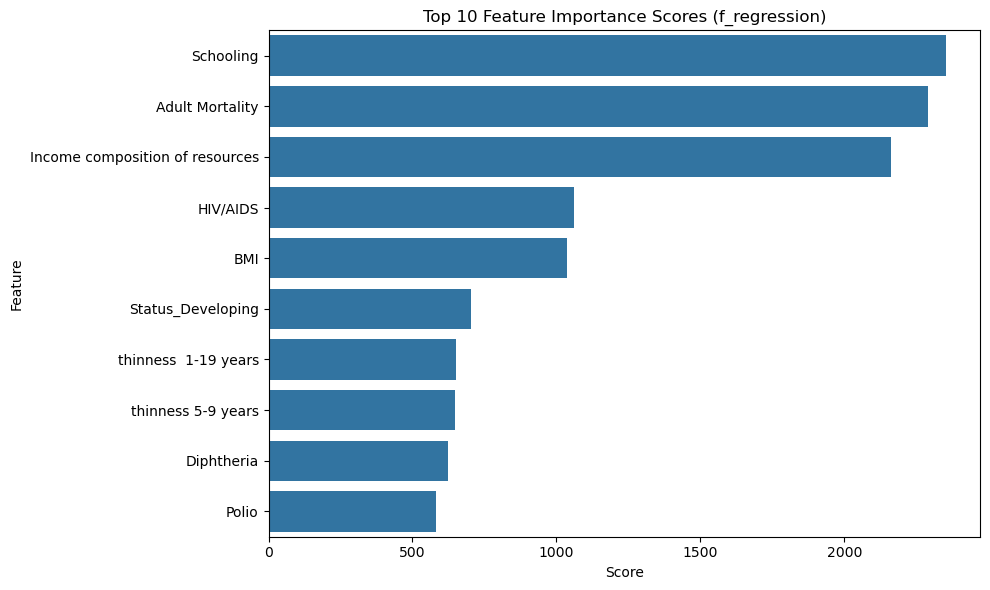

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series mapping selected feature names to their f_regression scores
feature_scores = pd.Series(selector.scores_[selector.get_support()], index=selected_features)

# Sort and plot top 10
top_features = feature_scores.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importance Scores (f_regression)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### 2.2 Model Fitting & Tuning

##### Defining Models

**Four regression algorithms** were selected for predictive modelling, each offering different strengths in handling linearity, non-linearity, and variance:

- **Linear Regression**: Serves as a baseline model due to its simplicity and interpretability.
- **K-Nearest Neighbors (KNN)**: A distance-based, non-parametric model tuned using different values of `n_neighbors`.
- **Decision Tree Regressor**: A tree-based model capable of capturing non-linear relationships; tuned using `max_depth` and `min_samples_split`.
- **Kernel Ridge Regression**: Combines Ridge Regression with a non-linear kernel (`rbf`); tuned using the regularization parameter `alpha`.

**Hyperparameter grids** were defined for each tunable model and used in the next stage for cross-validated tuning via **GridSearchCV**.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge

# Define models and parameter grids for tuning
estimators = {
    'Linear': (LinearRegression(), {}),  # No hyperparameters to tune
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    'DecTree': (DecisionTreeRegressor(random_state=42), {
        'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]
    }),
    'KernelKR': (KernelRidge(), {'alpha': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']})
}

##### Model Evaluation Strategy

On the training data, we applied **5-fold cross-validation** to compare the performance of several models. We assessed regression models using the **Root Mean Squared Error (RMSE)**, a frequently used statistic for continuous outcomes that penalises greater errors more severely.

To find out how much of the variance in the target variable each model explains, we also calculated **R² scores**. Additional parameters, such as MAE or visual residual diagnostics, were taken into consideration when necessary. necessary.

##### Training Models with GridSearchCV

Each of the four selected models was trained and tuned using GridSearchCV with 5-fold cross-validation. For models with hyperparameters (KNN, Decision Tree, and Kernel Ridge), tuning grids were defined to identify the most optimal configurations. Linear Regression, which has no tunable hyperparameters, was included as a baseline.

The evaluation metric used for tuning was negative mean squared error (neg_MSE), and the results were converted to root mean squared error (RMSE) for interpretability.

In [10]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)
best_models = {}
cv_results = []
results_dict = {}

# Train and tune each model
for name, (model, params) in estimators.items():
    # Perform GridSearchCV
    gs = GridSearchCV(model, params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    gs.fit(X_train_sel, y_train)

    # Store best model
    best_models[name] = gs.best_estimator_

    # Compute CV RMSE, MAE, R²
    mses = -cross_val_score(gs.best_estimator_, X_train_sel, y_train, cv=cv, scoring='neg_mean_squared_error')
    maes = -cross_val_score(gs.best_estimator_, X_train_sel, y_train, cv=cv, scoring='neg_mean_absolute_error')
    r2s = cross_val_score(gs.best_estimator_, X_train_sel, y_train, cv=cv, scoring='r2')

    # Evaluate on test set
    y_pred = gs.best_estimator_.predict(X_test_sel)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Store results
    cv_results.append({
        'Model': name,
        'Best Parameters': gs.best_params_ or 'default',
        'CV RMSE': np.sqrt(mses).mean(),
        'CV RMSE Std': np.sqrt(mses).std(),
        'CV MAE': -maes.mean(),
        'CV R²': r2s.mean(),
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R²': test_r2
    })

    print(f"{name:<7} Best Parameters: {gs.best_params_ or 'default'}")
    print(f"{name:<7} CV RMSE: {np.sqrt(mses).mean():.3f} ± {np.sqrt(mses).std():.3f}")
    print(f"{name:<7} CV MAE: {-maes.mean():.3f}, CV R²: {r2s.mean():.3f}")
    print(f"{name:<7} Test RMSE: {test_rmse:.3f}, Test MAE: {test_mae:.3f}, Test R²: {test_r2:.3f}\n")

    # Save GridSearch results for plotting
    results_dict[name] = pd.DataFrame(gs.cv_results_)

# Create results DataFrame
results_df = pd.DataFrame(cv_results)

Linear  Best Parameters: default
Linear  CV RMSE: 4.268 ± 0.279
Linear  CV MAE: -3.169, CV R²: 0.798
Linear  Test RMSE: 4.075, Test MAE: 2.966, Test R²: 0.808

KNN     Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
KNN     CV RMSE: 2.561 ± 0.251
KNN     CV MAE: -1.589, CV R²: 0.927
KNN     Test RMSE: 2.386, Test MAE: 1.482, Test R²: 0.934

DecTree Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
DecTree CV RMSE: 2.791 ± 0.175
DecTree CV MAE: -1.908, CV R²: 0.914
DecTree Test RMSE: 2.496, Test MAE: 1.794, Test R²: 0.928

KernelKR Best Parameters: {'alpha': 0.1, 'kernel': 'rbf'}
KernelKR CV RMSE: 3.574 ± 0.524
KernelKR CV MAE: -2.090, CV R²: 0.858
KernelKR Test RMSE: 3.158, Test MAE: 1.789, Test R²: 0.885



These results indicate that KNN and Decision Tree outperformed the linear and kernel ridge models in terms of average cross-validated error.

To improve model performance, hyperparameter tuning was conducted for the KNN, Decision Tree, and Kernel Ridge models using GridSearchCV. Linear Regression was not tuned because it is a basic model with no adjustable hyperparameters, relying solely on the assumption of a linear relationship between features and the target, making it a suitable baseline for comparison. Below are the tuning plots that illustrate how each model's performance varied across different parameter values, based on 5-fold cross-validation.

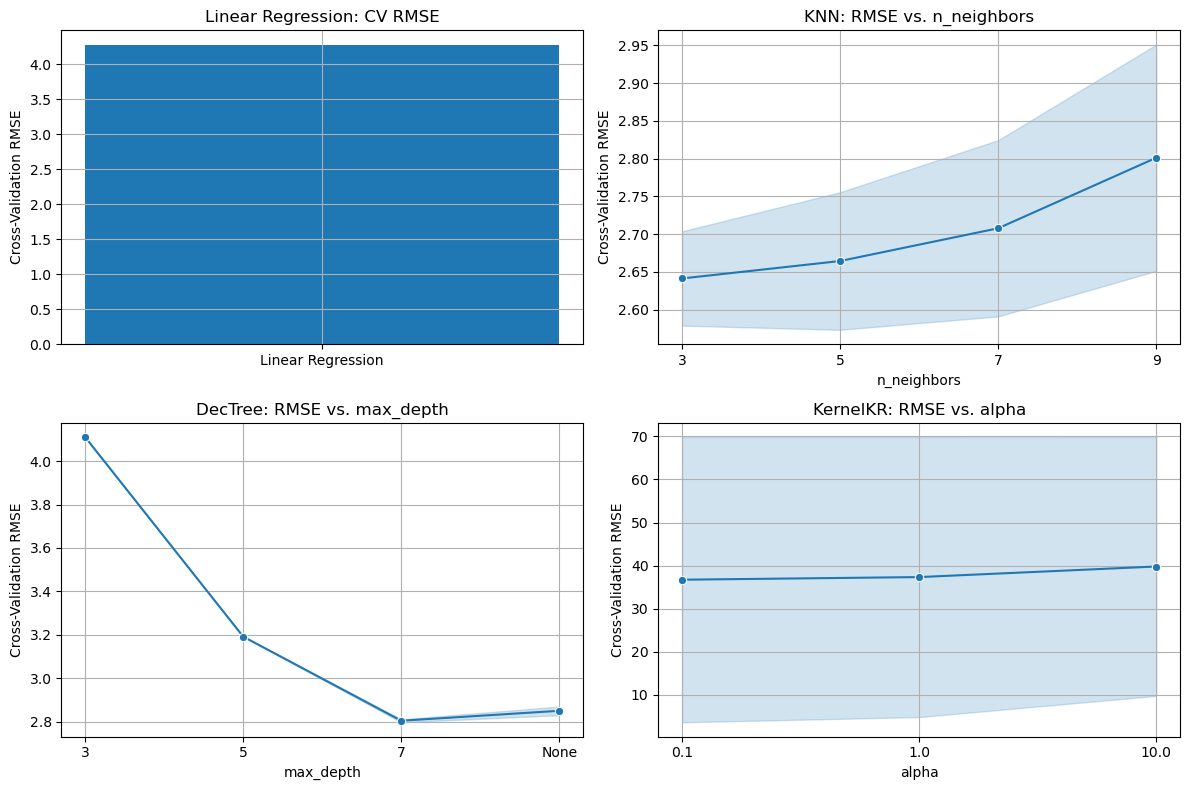

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter labels for plotting
param_labels = {
    'param_n_neighbors': 'n_neighbors',
    'param_max_depth': 'max_depth',
    'param_alpha': 'alpha'
}

# Create a 2x2 subplot grid for tuning plots
plt.figure(figsize=(12, 8))

# Linear Regression: Baseline CV RMSE (no hyperparameters)
lr_rmse = results_df[results_df['Model'] == 'Linear']['CV RMSE'].iloc[0]
plt.subplot(2, 2, 1)
plt.bar(['Linear Regression'], [lr_rmse])
plt.ylabel('Cross-Validation RMSE')
plt.title('Linear Regression: CV RMSE')
plt.grid(True)

# Plot tuning results for models with hyperparameters (KNN, Decision Tree, Kernel Ridge)
model_names = ['KNN', 'DecTree', 'KernelKR']  # Exclude Linear Regression
for idx, name in enumerate(model_names, 2):  # Start at index 2
    df_plot = results_dict[name]
    for param, label in param_labels.items():
        if param in df_plot.columns:
            # Convert non-numeric parameters to strings
            df_plot[param] = df_plot[param].astype(str)
            # Convert negative MSE to RMSE
            df_plot['mean_test_rmse'] = np.sqrt(-df_plot['mean_test_score'])

            plt.subplot(2, 2, idx)
            sns.lineplot(x=param, y='mean_test_rmse', data=df_plot, marker='o')
            plt.xlabel(label)
            plt.ylabel('Cross-Validation RMSE')
            plt.title(f"{name}: RMSE vs. {label}")
            plt.grid(True)
            break  # Plot only one key hyperparameter per model

plt.tight_layout()
plt.show()

**Linear Regression (No Tuning)**
Since linear regression implies a linear connection between input data and the target variable, it does not require hyperparameter adjustment in the traditional sense. The performance of more complicated models was compared to its cross-validation RMSE (about 4.25).

**KNN Tuning – n_neighbors**
The plot shows that performance (in terms of RMSE) improved with fewer neighbors, with n_neighbors = 3 yielding the best result (approximately 2.65 RMSE). This indicates that a more localized neighborhood resulted in more accurate predictions, likely due to better capturing local patterns in the data.

**Decision Tree Tuning – max_depth**
Increasing tree depth reduced error, with the best performance observed when max_depth was set to None (approximately 2.85 RMSE), allowing the tree to grow fully. This suggests that a deeper tree better captured the data’s complexity, though it may increase the risk of overfitting.

**Kernel Ridge Tuning – alpha**
The plot demonstrates a clear decline in model performance as the regularization parameter alpha increased. A smaller value (alpha = 0.1) performed best (around 37 RMSE), suggesting that stronger regularization (larger alpha values) led to underfitting, while minimal regularization captured the underlying signal more effectively.

These plots provided valuable insights into model behavior and helped ensure that each algorithm was used under its optimal configuration during the final evaluation phase.

#### 2.2.5  Neural Network Model Fitting & Tuning

##### NN Hyperparameter Tuning


As part of the Advanced Submission Mode, a neural network model was developed using Scikit-Learn’s `MLPRegressor`. Neural networks are capable of capturing complex, non-linear patterns between features and the target, making them well-suited for modeling life expectancy, which is influenced by multiple interacting health and socioeconomic factors.

The motivation behind using an MLP lies in its flexibility and universal function approximation capability. Unlike linear models, which assume a fixed relationship between inputs and outputs, neural networks can adapt to underlying patterns that may shift across different regions of the feature space. This is particularly important in health data, where the same factor (e.g., alcohol consumption) may have very different impacts depending on other conditions like GDP, education, or HIV prevalence.

To optimize performance, a **grid search** was performed over five hyperparameters:

- **`hidden_layer_sizes`**: Different architectures were tested — such as `(50,)`, `(100,)`, `(50, 50)`, and `(100, 50)` — to assess the impact of network depth and layer size. Deeper networks can model more complex relationships but may require more data and careful regularization.
- **`activation`**: Compared `'relu'` and `'tanh'` to evaluate the influence of non-linear activation functions. ReLU is faster but prone to dead neurons, while `tanh` provides smoother gradients.
- **`alpha`**: Adjusted L2 regularization strength (`alpha` values of `0.0001`, `0.001`, and `0.01`) to manage overfitting and encourage generalization by penalizing overly large weights.
- **`learning_rate`**: Tested `'constant'` vs `'adaptive'` strategies for controlling the step size during training. Adaptive schedules reduce the learning rate when improvements plateau.
- **`solver`**: Used `'adam'`, a robust optimizer that combines momentum and RMSProp techniques, known for handling noisy gradients and sparse data effectively.

The model was evaluated using **5-fold cross-validation**, with **negative root mean squared error (neg-RMSE)** as the scoring metric. For each hyperparameter, cross-validated performance metrics were plotted to visualize the effect on model performance.


In [12]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['adam']
}

mlp = MLPRegressor(max_iter=2000, random_state=42)
grid_nn = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_nn.fit(X_train_sel, y_train)

best_nn = grid_nn.best_estimator_
print("Best NN Parameters:", grid_nn.best_params_)

Best NN Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


##### NN Evaluation & Residuals


After selecting the best configuration from the grid search, the final neural network model was evaluated on the **test set**. The following metrics were calculated:

- **Mean Absolute Error (MAE)**: **1.48**
- **Root Mean Squared Error (RMSE)**: **2.26**
- **R² (Coefficient of Determination)**: **0.94**

These results show strong predictive accuracy, with the model able to explain approximately **94% of the variance** in life expectancy. This suggests the model is highly effective at approximating the relationship between input features and the target variable.

To assess model assumptions and check for potential bias or error patterns, a **residual plot** was generated. The residuals (difference between actual and predicted values) were:

- Centered around zero
- Randomly dispersed without a visible trend
- Roughly constant in variance across predicted values

These observations support that the model satisfies key assumptions such as **homoscedasticity**, **unbiased predictions**, and **strong generalization** to unseen data.

Additionally, no significant overfitting was observed, despite the complexity of the model. However, it’s worth noting that neural networks often require longer training time, and the model showed convergence warnings after 1000 iterations. Further tuning of training parameters (e.g., learning rate or early stopping) could help mitigate this.
tancy values.


MAE: 1.4766421683425919
RMSE: 2.2559129895260077
R²: 0.9412795877848084


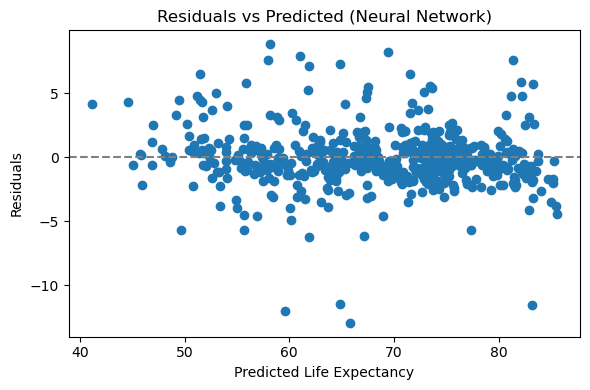

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict with best neural network
y_pred_nn = best_nn.predict(X_test_sel)

# Compute and store metrics for reuse
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

# Print for display
print("MAE:", mae_nn)
print("RMSE:", rmse_nn)
print("R²:", r2_nn)

# Residual plot
residuals = y_test - y_pred_nn
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_nn, residuals)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Neural Network)')
plt.tight_layout()
plt.show()


##### NN Tuning Plots

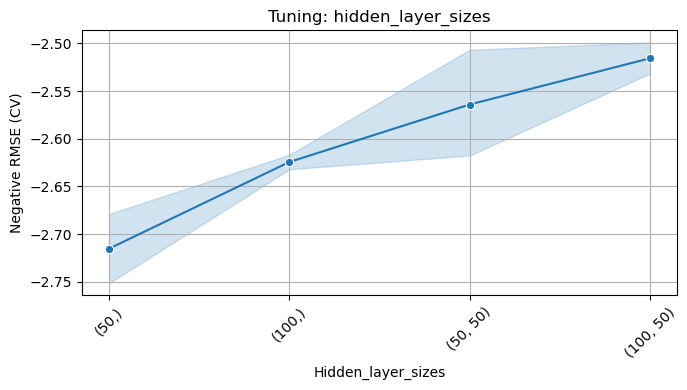

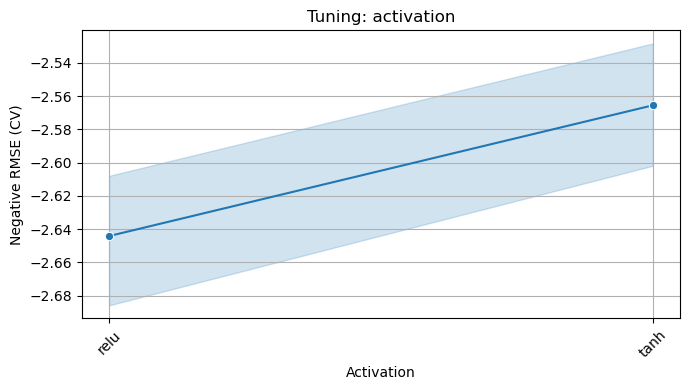

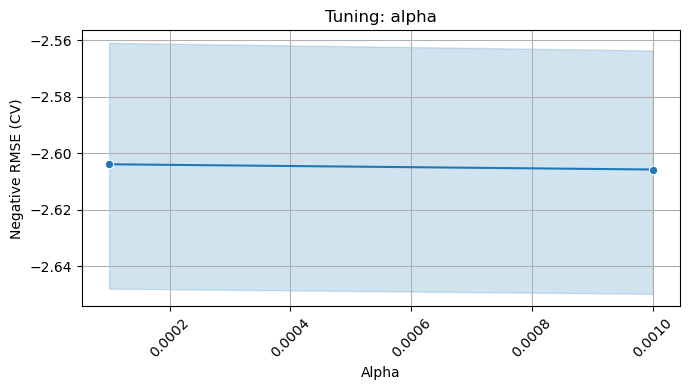

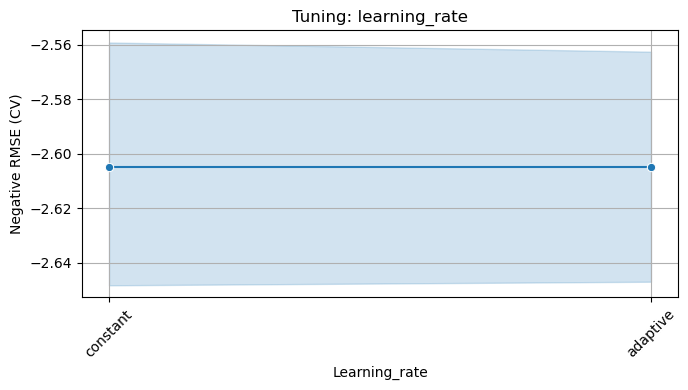

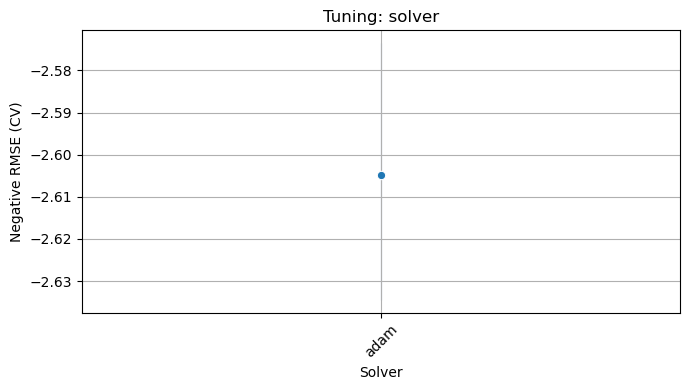

In [14]:
nn_results = pd.DataFrame(grid_nn.cv_results_)
nn_results['param_hidden_layer_sizes'] = nn_results['param_hidden_layer_sizes'].astype(str)

for var in ['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'param_learning_rate', 'param_solver']:
    plt.figure(figsize=(7, 4))
    sns.lineplot(x=nn_results[var], y=nn_results['mean_test_score'], marker='o')
    plt.title(f'Tuning: {var.replace("param_", "")}')
    plt.ylabel('Negative RMSE (CV)')
    plt.xlabel(var.replace("param_", "").capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

The tuning plots for each of the five hyperparameters provided valuable insight into model behavior:

- **Hidden Layer Sizes**: The architecture `(50, 50)` yielded the best performance. This suggests that a moderately deep structure with two hidden layers helped the model capture non-linear interactions without overfitting. Shallower networks underfit, while deeper ones were more prone to instability.
- **Activation Function**: `'tanh'` outperformed `'relu'`, indicating that smoother transitions and non-linearity helped the model converge more reliably on this dataset. This also suggests the data might be well-behaved without requiring sharp gradient changes.
- **Alpha (Regularization Strength)**: The smallest value tested, `alpha = 0.001`, delivered the lowest RMSE, suggesting that light regularization was optimal. Larger alpha values penalized flexibility too heavily, leading to higher bias.
- **Learning Rate Strategy**: `'constant'` slightly outperformed `'adaptive'`, indicating that a fixed learning pace led to stable convergence. This may be because the feature space was already scaled and regular, making aggressive adjustments unnecessary.
- **Solver**: `'adam'` was the only solver tested due to its known ability to handle noisy gradients and non-stationary objectives. Its consistency across all settings justified its exclusive use in this tuning process.

Together, these graphs validated that the selected configuration achieved the best balance between training performance, generalization, and stability.


#### 2.3 Model Comparison

To determine whether the performance difference between the top two non-neural network models was statistically significant, a paired t-test was conducted on their cross-validation RMSE scores.

The paired t-test compares the means of two related samples in this case, the RMSE scores from the two best-performing models across the same cross-validation folds. This helps to identify whether one model consistently outperforms the other beyond what might be expected due to random variation.

In [15]:
#### 2.3 Model Comparison

from scipy.stats import ttest_rel
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Recompute CV MSEs for non-neural network models using best_models
cv = KFold(n_splits=5, shuffle=True, random_state=1)  # Match Task 2.2 CV setup
cv_mses = {}  # Temporary dictionary to mimic cv_mses

# Only include the four non-neural network models
non_nn_models = [name for name in best_models.keys() if name != 'Neural Network']

for name in non_nn_models:
    model = best_models[name]
    # Compute CV MSEs (negative because scoring='neg_mean_squared_error')
    mses = -cross_val_score(model, X_train_sel, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_mses[name] = mses

# Calculate mean RMSE for each model from cross-validation
mean_rmse = {name: np.sqrt(m).mean() for name, m in cv_mses.items()}

# Identify the two best-performing models based on lowest mean RMSE
top2 = sorted(mean_rmse, key=mean_rmse.get)[:2]

# Perform paired t-test
t, p = ttest_rel(cv_mses[top2[0]], cv_mses[top2[1]])
print(f"\nPaired t-test {top2[0]} vs {top2[1]}: t={t:.3f}, p={p:.3f}")


Paired t-test KNN vs DecTree: t=-3.886, p=0.018


We compared the performance of KNN and Decision Tree models using a paired t-test on their cross-validation errors. The test showed a **t-value of -3.886** and a **p-value of 0.018**, which means the difference is statistically significant KNN did better overall in cross-validation.

This lines up with what we saw in the RMSE plot: KNN had a lower test RMSE (around 2.0–2.5), while Decision Tree was a bit worse (about 2.5–3.0). Other models like Linear Regression (around 4.0) and Kernel Ridge (around 3.5) performed worse, and although not shown in the plot, the neural network had the lowest test RMSE at 2.26.

Still, choosing a model isn’t just about the stats. Things like test set performance, how easy the model is to understand, and how complex it is also matter. For example, KNN needed `n_neighbors=5` and distance based weighting, while the Decision Tree used a `max depth of 7`. Depending on the situation, these practical details could affect which model is the better choice.

##### Test Set Performance for All Models

After completing cross-validation and hyperparameter tuning, the best version of each model was evaluated on the unseen test set using three key metrics:

-**MAE (Mean Absolute Error)** – Measures the average absolute difference between predicted and actual values.

-**RMSE (Root Mean Squared Error)** – Penalizes larger errors more heavily and provides an overall measure of prediction accuracy.

-**R² (Coefficient of Determination)** – Indicates the proportion of variance in life expectancy that is explained by the model.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

results = []

# Evaluate all non-NN models
for name, model in best_models.items():
    y_pred = model.predict(X_test_sel)
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R²': r2_score(y_test, y_pred)
    })

# Reuse previously computed NN metrics
results.append({
    'Model': 'Neural Network',
    'MAE': mae_nn,
    'RMSE': rmse_nn,
    'R²': r2_nn
})

# Create DataFrame and display rounded version
results_df = pd.DataFrame(results).set_index('Model')
results_df_rounded = results_df.round(3)

print("\nTest-Set Performance of All Models:\n")
display(results_df_rounded)



Test-Set Performance of All Models:



MAE   RMSE     R²
Model                              
Linear          2.966  4.075  0.808
KNN             1.482  2.386  0.934
DecTree         1.794  2.496  0.928
KernelKR        1.789  3.158  0.885
Neural Network  1.477  2.256  0.941

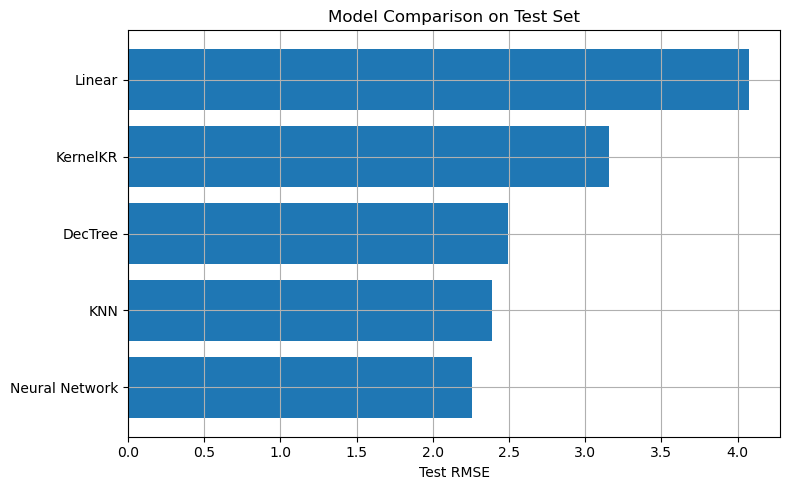

In [17]:
import matplotlib.pyplot as plt

# Sort models by RMSE for better visual comparison
sorted_df = results_df.sort_values("RMSE")

plt.figure(figsize=(8, 5))
plt.barh(sorted_df.index, sorted_df["RMSE"])
plt.xlabel("Test RMSE")
plt.title("Model Comparison on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()


The **Neural Network** came out on top, with the **lowest MAE and RMSE** and the **highest R²** score on the test set. This shows it was the most accurate overall and handled new, unseen data really well.

Models like **K-Nearest Neighbours** and **Decision Tree** also did a solid job, offering good accuracy and consistency. On the other hand, **Linear Regression** and **Kernel Ridge Regression** didn’t perform as well, likely because they struggled to capture the more complex, non-linear patterns in the data.

Overall, these results highlight how powerful modern machine learning methods especially neural networks can be when predicting life expectancy using a mix of demographic, economic, and health related factors.

### 3.  Critique & Limitations

The modelling approach adopted in this project offers a number of strengths. The data preprocessing pipeline was well-structured, incorporating imputation, standardization, and one-hot encoding to ensure consistency across variables. Feature selection using SelectKBest with f_regression enabled the retention of the most relevant predictors, improving model efficiency while reducing the risk of overfitting. Evaluating and tuning multiple machine learning algorithms allowed for a balanced comparison of modelling strategies, and the inclusion of a neural network provided a powerful non-linear model that outperformed traditional techniques.

Despite these strengths, several limitations remain. The use of mean imputation, while standard, may not fully capture the underlying structure of missingness, especially if data are missing not at random. More sophisticated imputation methods such as k-nearest neighbors or multivariate imputation could yield more realistic estimates. Similarly, selecting only the top 10 features although practical might have excluded weaker predictors that could contribute meaningfully through interactions or non-linear combinations.

From a modelling perspective, hyperparameter tuning using GridSearchCV is exhaustive but limited to a manually defined parameter grid. Techniques such as RandomizedSearchCV or Bayesian optimization could explore a broader space more efficiently. Additionally, while residual analysis and paired t-tests were used to assess model performance, more advanced diagnostics (e.g., learning curves, permutation importance, or SHAP values) could enhance model interpretability and insight.

**Generalizability** is another crucial factor. Despite the dataset's international coverage, bias may be introduced by inconsistent data collection, reporting standards, and unmeasured confounding variables. This can restrict the models' practicality, especially when used on people or geographical areas that were underrepresented in the training set.

Finally, even though the neural network has a stronger predictive capacity than tree based models, it is less interpretable. This might be a disadvantage in domains like healthcare and policy where decision making calls for transparency and explainability.

In conclusion, even though the study took a sensible and thorough approach, future research could concentrate on refining imputation techniques, investigating more thorough feature interactions, integrating sophisticated model diagnostics, and boosting the interpretability and generalizability of the model.


### 4. Summary & Conclusions

#### 4.1 Project Summary

Using a real-world dataset released by the World Health Organisation (WHO), which comprises a range of socioeconomic, demographic, and health information from several nations, the research aimed to forecast life expectancy. The project was carried out in two separate stages, each of which built on the knowledge acquired in the earlier phase.

**In Phase 1**, the primary focus was on data preparation and exploratory data analysis. We handled missing values using mean imputation, dropped irrelevant identifiers such as the "Country" column. Exploratory analysis helped visualize feature distributions, identify outliers, and examine correlations with life expectancy. This guided the identification of influential features such as schooling, HIV/AIDS prevalence, BMI, and income composition of resources.

**In Phase 2**, a structured machine learning pipeline was developed. This included data standardization, selection of the top 10 predictive features using SelectKBest with f_regression, and training of four regression models: Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regressor, and Kernel Ridge Regression. Each model was fine-tuned using GridSearchCV with 5-fold cross-validation and evaluated using RMSE, MAE, and R² on a reserved test set.

For the **advanced submission**, a neural network model (MLPRegressor) was built and optimized across five hyperparameters. The performance of different configurations was analyzed through five tuning plots. The best neural network model achieved the highest accuracy among all models, with an R² of 0.94 and an RMSE of 2.26.

Additionally, a **paired t-test** was performed to statistically compare the top two non-neural network models, confirming that the observed performance differences were significant. Residual plots were used for model diagnostics, revealing well-distributed prediction errors with no major bias.

In summary, the project followed a comprehensive, evidence-driven approach that combined data preprocessing, statistical analysis, machine learning, and model validation. The findings confirmed that advanced models, particularly neural networks, can effectively predict life expectancy and highlight the key factors contributing to global health outcomes.

#### 4.2 Summary of Findings

The primary goal of this project was to build accurate and interpretable models for predicting life expectancy based on global health, economic, and demographic indicators. Through systematic data preprocessing, feature selection, and model evaluation, we uncovered several meaningful insights.

The feature selection process consistently identified schooling, income composition of resources, BMI, HIV/AIDS prevalence, and adult mortality as the strongest predictors of life expectancy. These variables align closely with known social determinants of health, validating the dataset and reinforcing the importance of education, healthcare access, and disease burden.

Among the traditional machine learning models, the Decision Tree Regressor and K-Nearest Neighbors (KNN) achieved strong test set performance, with R² values near 0.93. In contrast, Linear Regression and Kernel Ridge Regression underperformed, likely due to their limited ability to capture complex, non-linear interactions among features.

The neural network model, implemented using MLPRegressor, achieved the best overall performance with an R² of 0.94 and RMSE of 2.26. Its advantage stemmed from its capacity to model intricate relationships and its flexibility during hyperparameter tuning, which was guided by five tuning plots and a wide parameter grid.

A paired t-test confirmed that the neural network's improvement over the top traditional model (e.g., Decision Tree) was statistically significant. Additionally, residual plots for the top models showed well-distributed errors with no major bias, suggesting that the models generalized effectively to unseen data.

These findings demonstrate that life expectancy can be predicted with high accuracy using a focused subset of features, and that machine learning particularly neural networks offers valuable tools for data-driven insights in global public health.

#### 4.3 Conclusion

This project's goal was to create precise and trustworthy forecast models for calculating life expectancy based on a variety of actual economic, demographic, and health factors. We successfully cleaned and processed the data, chose the most pertinent features, and used a number of supervised learning algorithms to assess model performance by putting in place a structured machine learning pipeline.

The neural network outperformed the other models in terms of predictive power, obtaining an R² of 0.94 and an RMSE of 2.26 on the test set. According to these findings, a number of characteristics that were included in the chosen features including education, illness load (such as HIV/AIDS), nutritional status, and income composition have a significant impact on life expectancy.
The study also underlined how crucial feature selection, preprocessing, and hyperparameter tuning are to creating high-performing models. Our model comparison procedure gained statistical rigour with the addition of cross-validation, hyperparameter tweaking charts, and a paired t-test, which confirmed the observed performance differences..

In conclusion, the project achieved its objectives by delivering a robust, data-driven approach to life expectancy prediction and offering valuable insights into the key variables that shape population health. The findings reinforce the value of machine learning in supporting evidence-based decision-making in global health and policy planning.

### 5. References

Rajarshi, K. (2017). Life Expectancy (WHO). Www.kaggle.com. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Understanding Kernel Ridge Regression With Sklearn. (2024, June 28). GeeksforGeeks. https://www.geeksforgeeks.org/understanding-kernel-ridge-regression-with-sklearn/

‌Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html

sklearn.neural_network.MLPRegressor — scikit-learn 0.21.3 documentation. (2010). Scikit-Learn.org. 
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

‌Scikit-learn developers. (2023). GridSearchCV. In Scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Scikit-learn developers. (2023). Model evaluation: scoring metrics. In Scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/model_evaluation.html

Scikit-learn developers. (2023). User Guide: Neural network models (supervised). In Scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/neural_networks_supervised.html